In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# There was something Jocelyn did to modify the image sizes without modifying the dtype
size = 14
train_data = datasets.MNIST(
    root = '../data/14x14',
    train = True,                         
    transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(size),
                    transforms.Normalize(0, 1)
                ]), 
    download = True,            
)
test_data = datasets.MNIST(
    root = '../data/14x14', 
    train = False, 
    transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(size),
                    transforms.Normalize(0, 1)
                ]),
    download = False,
)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631159818/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


<h3>MNIST Dataset is organized by:</h3>
<div>Set of images (with channels) and labels --> train_data</div>
<div>image (with channels) AND label --> train_data[i (0,59999)]</div>
<div>image (with channels) --> train_data[i][i (0,1)]</div>
<div>image by itself (2D image) --> train_data[i][i][i (0)]</div>

In [3]:
# Images and labels are stored as a tuple (image, label)

print(len(train_data[0]), '\n\n')
print(train_data[0])

2 


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0353,
          0.2569, 0.1971, 0.4127, 0.3667, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0480, 0.5461, 0.7392, 0.9108, 0.9922,
          0.9902, 0.5608, 0.6206, 0.2922, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0176, 0.6941, 0.8490, 0.9451, 0.3833,
          0.6716, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0137, 0.2882, 0.7706, 0.0020,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0108, 0.7049, 0.4461,
          0.1069, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.079

In [4]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0353,
           0.2569, 0.1971, 0.4127, 0.3667, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0480, 0.5461, 0.7392, 0.9108, 0.9922,
           0.9902, 0.5608, 0.6206, 0.2922, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0176, 0.6941, 0.8490, 0.9451, 0.3833,
           0.6716, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0137, 0.2882, 0.7706, 0.0020,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0108, 0.7049, 0.4461,
           0.1069, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

In [5]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0353,
          0.2569, 0.1971, 0.4127, 0.3667, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0480, 0.5461, 0.7392, 0.9108, 0.9922,
          0.9902, 0.5608, 0.6206, 0.2922, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0176, 0.6941, 0.8490, 0.9451, 0.3833,
          0.6716, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0137, 0.2882, 0.7706, 0.0020,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0108, 0.7049, 0.4461,
          0.1069, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0794, 0.7

In [6]:
# Prints the entire dataset
train_data[0][0].shape

torch.Size([1, 14, 14])

In [7]:
# Prints one image
train_data[0][0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0353, 0.2569,
         0.1971, 0.4127, 0.3667, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0480, 0.5461, 0.7392, 0.9108, 0.9922, 0.9902,
         0.5608, 0.6206, 0.2922, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0176, 0.6941, 0.8490, 0.9451, 0.3833, 0.6716,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0137, 0.2882, 0.7706, 0.0020, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0108, 0.7049, 0.4461, 0.1069,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0794, 0.7098, 0.8608,
  

In [8]:
# Prints one array of pixels (not the entire image)
train_data[0][0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

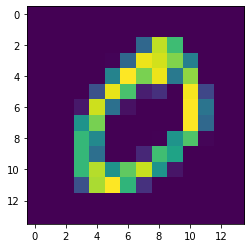

In [9]:
plt.imshow(train_data[1][0][0])

In [10]:
transforms.Resize(size=14)(train_data.data)

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,  94,   0,   0],
         ...,
         [  0,   0,  57,  ...,   0,   0,   0],
         [  0,   0,  97,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,  10,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]

In [11]:
type(train_data)

torchvision.datasets.mnist.MNIST

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


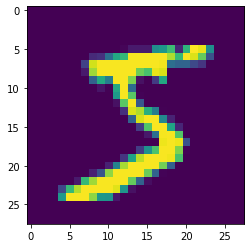

In [12]:
plt.imshow(train_data.train_data[0])

In [13]:
# Resize(size[, interpolation, max_size, …])

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


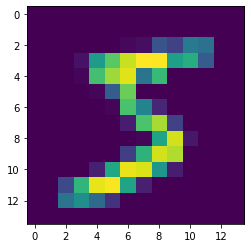

In [14]:
resized = transforms.Resize(size=14)(train_data.train_data)
plt.imshow(resized[0])

In [15]:
type(resized)

torch.Tensor

In [16]:
resized_28 = transforms.Resize(size=28)(train_data.train_data)
resized_14 = transforms.Resize(size=14)(train_data.train_data)
resized_7 = transforms.Resize(size=7)(train_data.train_data)
resized_4 = transforms.Resize(size=4)(train_data.train_data)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


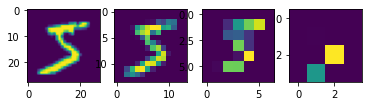

In [17]:
f, axarr = plt.subplots(1,4)
axarr[0].imshow(resized_28[0])
axarr[1].imshow(resized_14[0])
axarr[2].imshow(resized_7[0])
axarr[3].imshow(resized_4[0])

<h1>Using Pytorch's Data loaders to feed data into CNN</h1>

In [18]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fcbef431898>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fcc126ba748>}

<h1>Defining the CNN</h1>

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        '''
        Goes through two layers of 2D convolutions, each followed by a 2x2 max pooling
        
        Dimensions:
        1.) Input Shape:          [batch_size, 1, 14, 14]
        
        2.) After conv:           [batch_size, 4, 12, 12]
            After max pooling:    [batch_size, 4, 6, 6]
        
        3.) After conv:           [batch_size, 8, 4, 4]
            After max pooling:    [batch_size, 8, 2, 2]
            
        4.) After flattening:     [batch_size, 8 * 2 * 2]
        '''
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=4,            
                kernel_size=3,              
                stride=1,                   
                padding=0,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(4, 8, 3, 1, 0),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(8 * 2 * 2, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 16 * 8 * 8)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization
    
    
    def compute_sizes(in_size, ker_size, padding, stride):
        pass

In [20]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=32, out_features=10, bias=True)
)


In [21]:
loss_func = nn.CrossEntropyLoss(); print(loss_func)   
optimizer = torch.optim.Adam(cnn.parameters(), lr= 1e-5); print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1e-05
    weight_decay: 0
)


<h1>Training the CNN</h1>
<div>Error source may be that the dataset resized_28 doesn't have 'labels', just 'images' ---> (for i, (images, labels))</div>

In [22]:
num_epochs = 100
train_acc_data = []
loss_data = []

def train(num_epochs, cnn, loaders):
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # measure accuracy and record loss
            train_output, last_layer = cnn(images)
            pred_y = torch.max(train_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()  
#             output = cnn(images)
#             correct += (output == labels).float().sum()
#             accuracy = 100 * correct / len(trainset)
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), accuracy))
            
            if (i+1) % 600 == 0:
                train_acc_data.append(accuracy)
                loss_data.append(loss)
            pass
        
        pass
    
    
    pass
    
train(num_epochs, cnn, loaders)

Epoch [1/100], Step [100/600], Loss: 2.3170, Accuracy: 0.1100
Epoch [1/100], Step [200/600], Loss: 2.3181, Accuracy: 0.1000
Epoch [1/100], Step [300/600], Loss: 2.3140, Accuracy: 0.1400
Epoch [1/100], Step [400/600], Loss: 2.3126, Accuracy: 0.1100
Epoch [1/100], Step [500/600], Loss: 2.3128, Accuracy: 0.1000
Epoch [1/100], Step [600/600], Loss: 2.3125, Accuracy: 0.1200
Epoch [2/100], Step [100/600], Loss: 2.3195, Accuracy: 0.0900
Epoch [2/100], Step [200/600], Loss: 2.3060, Accuracy: 0.1200
Epoch [2/100], Step [300/600], Loss: 2.3045, Accuracy: 0.1200
Epoch [2/100], Step [400/600], Loss: 2.3094, Accuracy: 0.0600
Epoch [2/100], Step [500/600], Loss: 2.3115, Accuracy: 0.0800
Epoch [2/100], Step [600/600], Loss: 2.3132, Accuracy: 0.1300
Epoch [3/100], Step [100/600], Loss: 2.3019, Accuracy: 0.1400
Epoch [3/100], Step [200/600], Loss: 2.3157, Accuracy: 0.0800
Epoch [3/100], Step [300/600], Loss: 2.3001, Accuracy: 0.1000
Epoch [3/100], Step [400/600], Loss: 2.2844, Accuracy: 0.1600
Epoch [3

Epoch [22/100], Step [600/600], Loss: 1.9327, Accuracy: 0.6200
Epoch [23/100], Step [100/600], Loss: 1.9081, Accuracy: 0.5500
Epoch [23/100], Step [200/600], Loss: 1.9135, Accuracy: 0.6100
Epoch [23/100], Step [300/600], Loss: 1.8768, Accuracy: 0.6500
Epoch [23/100], Step [400/600], Loss: 1.8552, Accuracy: 0.6600
Epoch [23/100], Step [500/600], Loss: 1.9582, Accuracy: 0.5600
Epoch [23/100], Step [600/600], Loss: 1.9202, Accuracy: 0.5800
Epoch [24/100], Step [100/600], Loss: 1.9128, Accuracy: 0.6300
Epoch [24/100], Step [200/600], Loss: 1.9166, Accuracy: 0.6400
Epoch [24/100], Step [300/600], Loss: 1.8586, Accuracy: 0.6800
Epoch [24/100], Step [400/600], Loss: 1.8694, Accuracy: 0.6000
Epoch [24/100], Step [500/600], Loss: 1.8473, Accuracy: 0.6600
Epoch [24/100], Step [600/600], Loss: 1.8255, Accuracy: 0.6500
Epoch [25/100], Step [100/600], Loss: 1.8788, Accuracy: 0.5800
Epoch [25/100], Step [200/600], Loss: 1.8498, Accuracy: 0.6300
Epoch [25/100], Step [300/600], Loss: 1.7785, Accuracy:

Epoch [44/100], Step [500/600], Loss: 0.9812, Accuracy: 0.7800
Epoch [44/100], Step [600/600], Loss: 1.0565, Accuracy: 0.7700
Epoch [45/100], Step [100/600], Loss: 1.0574, Accuracy: 0.6800
Epoch [45/100], Step [200/600], Loss: 1.0956, Accuracy: 0.7200
Epoch [45/100], Step [300/600], Loss: 1.1050, Accuracy: 0.7000
Epoch [45/100], Step [400/600], Loss: 1.0815, Accuracy: 0.7300
Epoch [45/100], Step [500/600], Loss: 0.9937, Accuracy: 0.8100
Epoch [45/100], Step [600/600], Loss: 1.0690, Accuracy: 0.8000
Epoch [46/100], Step [100/600], Loss: 1.0846, Accuracy: 0.7300
Epoch [46/100], Step [200/600], Loss: 1.0795, Accuracy: 0.6700
Epoch [46/100], Step [300/600], Loss: 1.0926, Accuracy: 0.7000
Epoch [46/100], Step [400/600], Loss: 0.9207, Accuracy: 0.8100
Epoch [46/100], Step [500/600], Loss: 1.0160, Accuracy: 0.7800
Epoch [46/100], Step [600/600], Loss: 1.0636, Accuracy: 0.7300
Epoch [47/100], Step [100/600], Loss: 1.0541, Accuracy: 0.7300
Epoch [47/100], Step [200/600], Loss: 0.9639, Accuracy:

Epoch [66/100], Step [400/600], Loss: 0.5666, Accuracy: 0.8700
Epoch [66/100], Step [500/600], Loss: 0.6830, Accuracy: 0.7800
Epoch [66/100], Step [600/600], Loss: 0.6406, Accuracy: 0.7900
Epoch [67/100], Step [100/600], Loss: 0.6945, Accuracy: 0.8300
Epoch [67/100], Step [200/600], Loss: 0.7287, Accuracy: 0.7800
Epoch [67/100], Step [300/600], Loss: 0.7330, Accuracy: 0.7700
Epoch [67/100], Step [400/600], Loss: 0.6421, Accuracy: 0.8200
Epoch [67/100], Step [500/600], Loss: 0.7608, Accuracy: 0.7500
Epoch [67/100], Step [600/600], Loss: 0.7669, Accuracy: 0.7600
Epoch [68/100], Step [100/600], Loss: 0.7530, Accuracy: 0.8100
Epoch [68/100], Step [200/600], Loss: 0.6521, Accuracy: 0.8200
Epoch [68/100], Step [300/600], Loss: 0.7136, Accuracy: 0.7600
Epoch [68/100], Step [400/600], Loss: 0.6568, Accuracy: 0.7900
Epoch [68/100], Step [500/600], Loss: 0.6750, Accuracy: 0.8000
Epoch [68/100], Step [600/600], Loss: 0.6811, Accuracy: 0.7900
Epoch [69/100], Step [100/600], Loss: 0.6901, Accuracy:

Epoch [88/100], Step [300/600], Loss: 0.5498, Accuracy: 0.8100
Epoch [88/100], Step [400/600], Loss: 0.5326, Accuracy: 0.8400
Epoch [88/100], Step [500/600], Loss: 0.4832, Accuracy: 0.8600
Epoch [88/100], Step [600/600], Loss: 0.4819, Accuracy: 0.8900
Epoch [89/100], Step [100/600], Loss: 0.5677, Accuracy: 0.8200
Epoch [89/100], Step [200/600], Loss: 0.5330, Accuracy: 0.8800
Epoch [89/100], Step [300/600], Loss: 0.7069, Accuracy: 0.7700
Epoch [89/100], Step [400/600], Loss: 0.5605, Accuracy: 0.8200
Epoch [89/100], Step [500/600], Loss: 0.4778, Accuracy: 0.8500
Epoch [89/100], Step [600/600], Loss: 0.5771, Accuracy: 0.8400
Epoch [90/100], Step [100/600], Loss: 0.5422, Accuracy: 0.8300
Epoch [90/100], Step [200/600], Loss: 0.4801, Accuracy: 0.8800
Epoch [90/100], Step [300/600], Loss: 0.4764, Accuracy: 0.8300
Epoch [90/100], Step [400/600], Loss: 0.7411, Accuracy: 0.7900
Epoch [90/100], Step [500/600], Loss: 0.5638, Accuracy: 0.8100
Epoch [90/100], Step [600/600], Loss: 0.5096, Accuracy:

In [23]:
num_epochs = 10
test_acc_data = []

def test():
    cnn.eval()
        
    # Train the model
    correct = 0
    total = 0
    for images, labels in loaders['test']:
        test_output, last_layer = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        test_acc_data.append(accuracy)
        print("Accuracy: {:.4f}".format(accuracy))
        
#     print('Test Accuracy: %.2f' % accuracy)
    
test()

Accuracy: 0.8400
Accuracy: 0.8400
Accuracy: 0.8000
Accuracy: 0.8600
Accuracy: 0.8300
Accuracy: 0.8500
Accuracy: 0.9200
Accuracy: 0.8500
Accuracy: 0.8500
Accuracy: 0.8900
Accuracy: 0.7900
Accuracy: 0.8700
Accuracy: 0.8800
Accuracy: 0.8400
Accuracy: 0.9200
Accuracy: 0.8100
Accuracy: 0.8700
Accuracy: 0.8300
Accuracy: 0.8300
Accuracy: 0.8100
Accuracy: 0.8500
Accuracy: 0.8800
Accuracy: 0.8500
Accuracy: 0.8400
Accuracy: 0.8800
Accuracy: 0.9100
Accuracy: 0.8800
Accuracy: 0.8600
Accuracy: 0.8300
Accuracy: 0.8800
Accuracy: 0.8600
Accuracy: 0.8800
Accuracy: 0.8900
Accuracy: 0.8800
Accuracy: 0.8500
Accuracy: 0.8500
Accuracy: 0.8600
Accuracy: 0.9100
Accuracy: 0.8600
Accuracy: 0.9100
Accuracy: 0.8600
Accuracy: 0.8800
Accuracy: 0.8700
Accuracy: 0.8900
Accuracy: 0.8000
Accuracy: 0.8500
Accuracy: 0.8300
Accuracy: 0.9000
Accuracy: 0.8700
Accuracy: 0.8300
Accuracy: 0.8200
Accuracy: 0.8700
Accuracy: 0.8500
Accuracy: 0.8200
Accuracy: 0.8500
Accuracy: 0.8300
Accuracy: 0.8200
Accuracy: 0.7700
Accuracy: 0.87

In [24]:
# for i in range(len(acc_data)):
#     if acc_data[i] == 0.71:
#         print("fount at ", i)

# acc_data[600-1]

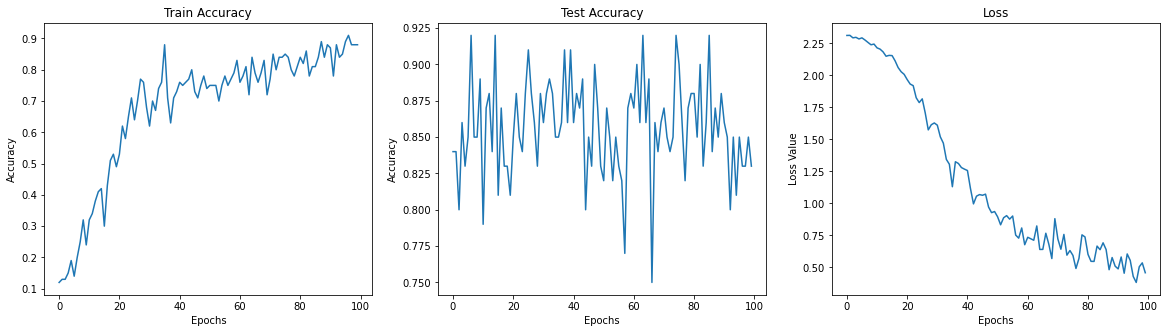

In [25]:
f, axarr = plt.subplots(1,3, figsize=(20, 5))
axarr[0].set_title("Train Accuracy")
axarr[0].set_xlabel("Epochs")
axarr[0].set_ylabel("Accuracy")
axarr[0].plot(train_acc_data)

axarr[1].set_title("Test Accuracy")
axarr[1].set_xlabel("Epochs")
axarr[1].set_ylabel("Accuracy")
axarr[1].plot(test_acc_data)


axarr[2].set_title("Loss")
axarr[2].set_xlabel("Epochs")
axarr[2].set_ylabel("Loss Value")
axarr[2].plot(loss_data)

In [26]:
cnn.train()
len(loaders['train'])

600

In [27]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [28]:
type(resized_28)

torch.Tensor

In [29]:
# for i, image in enumerate(loaders['train']):
#     print(i, image.shape)

<h1>Attempting to resize the dataset when importing with datasets.MNIST</h1>

In [30]:
# train_data = datasets.MNIST(
#     root = 'data',
#     train = True,                         
#     transform = transforms.Compose([
#                     transforms.ToTensor(),
#                     transforms.Resize(size=14)(train_data.data),
#                     transforms.Normalize(0, 1)
#                 ]), 
#     download = True,            
# )
# test_data = datasets.MNIST(
#     root = 'data', 
#     train = False, 
#     transform = transforms.Compose([
#                     transforms.ToTensor(),
#                     transforms.Resize(size=14)(test_data.data),
#                     transforms.Normalize(0, 1)
#                 ]) 
# )

In [31]:
train_data.data.shape

torch.Size([60000, 28, 28])

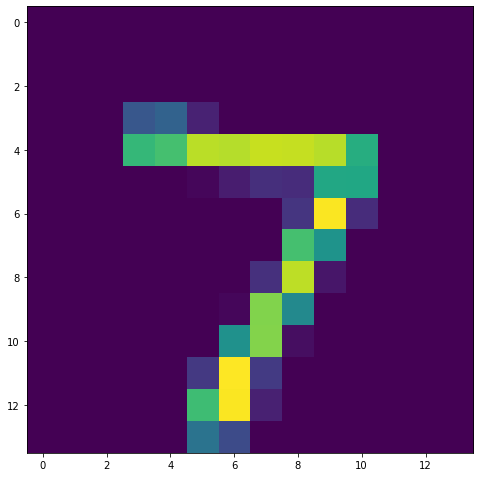

In [32]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(30)
plt.imshow(test_data[0][0][0])